# Dermatology

In [1]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
warnings.filterwarnings("ignore")


Installed version 0.2.0 of ehrapy is newer than the latest release 0.1.0! You are running a 
nightly version and features may break!

In [2]:
pd.set_option("display.max_columns", None)


## Getting the dataset

In [1]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.names


File ‘dermatology.data’ already there; not retrieving.

File ‘dermatology.names’ already there; not retrieving.



# Data Wrangling

In [4]:
names = ['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon',
         'polygonal papules', 'follicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement',
         'family history', 'melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis',
         'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
         'elongation of the rete ridges', 'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis',
         'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes', 'follicular horn plug',
         'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 'band-like infiltrate', 'Age', 'class']


In [5]:
data = pd.read_csv("dermatology.data", sep=",", names=names)


Since the dataset does not have a patient ID we add one.

In [6]:
data["patient_id"] = range(1, len(data) + 1)


Replace the "?" in Age attribute with NaA, and then convert it to integer.

In [7]:
data["Age"].replace('?', np.NaN, inplace=True)
data['Age'] = pd.to_numeric(data['Age']).astype('Int64')


In [8]:
data.set_index("patient_id", inplace=True)


In [9]:
data.to_csv("dermatology_prepared.csv")


## ehrapy sanity check

In [10]:
adata = ep.io.read("dermatology_prepared.csv",
                   extension="csv",
                   index_column="patient_id")


In [11]:
ep.ad.type_overview(adata)


Variable names for AnnData object with 366 obs and 35 vars                                   
╚══ 🔓 Unencoded variables                                                                   
    ╠══ erythema -> data type: floating                                                      
    ╠══ scaling -> data type: floating                                                       
    ╠══ definite borders -> data type: floating                                              
    ╠══ itching -> data type: floating                                                       
    ╠══ koebner phenomenon -> data type: floating                                            
    ╠══ polygonal papules -> data type: floating                                             
    ╠══ follicular papules -> data type: floating                                            
    ╠══ oral mucosal involvement -> data type: floating                                      
    ╠══ knee and elbow involvement -> data type: floating                                    
    ╠══ scalp involvement -> data type: floating                                             
    ╠══ family history -> data type: floating                                                
    ╠══ melanin incontinence -> data type: floating                                          
    ╠══ eosinophils in the infiltrate -> data type: floating                                 
    ╠══ PNL infiltrate -> data type: floating                                                
    ╠══ fibrosis of the papillary dermis -> data type: floating                              
    ╠══ exocytosis -> data type: floating                                                    
    ╠══ acanthosis -> data type: floating                                                    
    ╠══ hyperkeratosis -> data type: floating                                                
    ╠══ parakeratosis -> data type: floating                                                 
    ╠══ clubbing of the rete ridges -> data type: floating                                   
    ╠══ elongation of the rete ridges -> data type: floating                                 
    ╠══ thinning of the suprapapillary epidermis -> data type: floating                      
    ╠══ spongiform pustule -> data type: floating                                            
    ╠══ munro microabcess -> data type: floating                                             
    ╠══ focal hypergranulosis -> data type: floating                                         
    ╠══ disappearance of the granular layer -> data type: floating                           
    ╠══ vacuolisation and damage of basal layer -> data type: floating                       
    ╠══ spongiosis -> data type: floating                                                    
    ╠══ saw-tooth appearance of retes -> data type: floating                                 
    ╠══ follicular horn plug -> data type: floating                                          
    ╠══ perifollicular parakeratosis -> data type: floating                                  
    ╠══ inflammatory monoluclear inflitrate -> data type: floating                           
    ╠══ band-like infiltrate -> data type: floating                                          
    ╠══ Age -> data type: floating                                                           
    ╚══ class -> data type: floating                                                         

In [12]:
_ = ep.pp.calculate_qc_metrics(adata)


In [13]:
adata.obs


,missing_values_abs,missing_values_pct
patient_id,,
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
...,...,...
362,0,0.0
363,0,0.0
364,0,0.0


In [14]:
adata.var


,missing_values_abs,missing_values_pct,mean,median,standard_deviation,min,max
erythema,0,0.000000,2.068306,2.0,0.663844,0.0,3.0
scaling,0,0.000000,1.795082,2.0,0.700568,0.0,3.0
definite borders,0,0.000000,1.549180,2.0,0.906285,0.0,3.0
itching,0,0.000000,1.366120,1.0,1.136743,0.0,3.0
koebner phenomenon,0,0.000000,0.633880,0.0,0.906775,0.0,3.0
polygonal papules,0,0.000000,0.448087,0.0,0.956019,0.0,3.0
follicular papules,0,0.000000,0.166667,0.0,0.569808,0.0,3.0
oral mucosal involvement,0,0.000000,0.377049,0.0,0.833006,0.0,3.0
knee and elbow involvement,0,0.000000,0.614754,0.0,0.981635,0.0,3.0
scalp involvement,0,0.000000,0.519126,0.0,0.904400,0.0,3.0


scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for 
faster imputations.

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


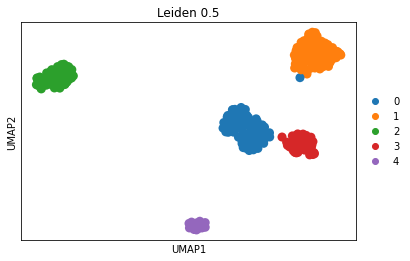

In [15]:
ep.pp.knn_impute(adata)
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")


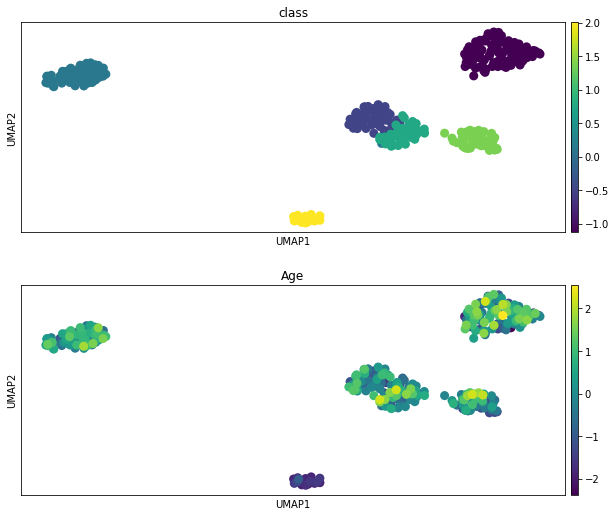

In [16]:
ep.pl.umap(adata, color=["class", "Age"], ncols=1, wspace=0.75)
